In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [60]:
relevant_la = 'Greenwich'
comparison_las = ['Bromley', 'Bexley', 'Lewisham', 'Tower Hamlets'] # this is in the order you would like to appear in bar charts & legend
co2e_per_kWh_gas = 0.182928926174497

In [46]:
year_dfs = []
for year in range(2005, 2022):
  df = pd.read_excel("raw-data/subnational_gas_consumption_statistics_2005-2021.xlsx", sheet_name=str(year), skiprows=5)
  df['Year'] = str(year)
  year_dfs = year_dfs + [df]
all_df = pd.concat(year_dfs).reset_index()
display(all_df)

,index,Code,Country or region,Local authority,Notes,Number of meters\n(thousands):\nDomestic\n,Number of meters\n(thousands):\nNon-Domestic,Number of meters\n(thousands):\nAll meters,Total consumption\n(GWh):\nDomestic\n,Total consumption\n(GWh):\nNon-Domestic,Total consumption\n(GWh):\nAll meters,Mean consumption\n(kWh per meter):\nDomestic\n,Mean consumption\n(kWh per meter):\nNon-Domestic,Mean consumption\n(kWh per meter):\nAll meters,Year,Median consumption\n(kWh per meter):\nDomestic\n,Median consumption\n(kWh per meter):\nNon-Domestic,Median consumption\n(kWh per meter):\nAll meters,Number of \nnon-consuming meters \n(thousands)
0,0,NaN,Great Britain,All local authorities,NaN,21594.972,398.187,21993.159,410737.002914,256850.365472,667587.368386,19020.029427,645049.600997,30354.319195,2005,NaN,NaN,NaN,NaN
1,1,NaN,England,All local authorities,NaN,18781.875,347.502,19129.377,355378.619951,216506.320353,571884.940304,18921.360085,623036.184980,29895.638541,2005,NaN,NaN,NaN,NaN
2,2,UKC,North East,All local authorities,NaN,1037.403,16.219,1053.622,20710.658157,13952.158200,34662.816357,19963.946660,860235.415254,32898.721132,2005,NaN,NaN,NaN,NaN
3,3,UKD,North West,All local authorities,NaN,2747.967,48.871,2796.838,53390.873953,35926.287793,89317.161746,19429.226753,735124.875550,31935.050134,2005,NaN,NaN,NaN,NaN
4,4,UKE,Yorkshire and The Humber,All local authorities,NaN,1989.970,36.997,2026.967,39024.143235,30648.965991,69673.109226,19610.417863,828417.601184,34373.085120,2005,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,377,S12000045,Scotland,East Dunbartonshire,NaN,45.162,0.448,45.610,751.352927,149.051823,900.404750,16636.839093,332704.961192,19741.388944,2021,14824.638128,125457.472180,14934.778909,0.382
6734,378,S12000047,Scotland,Fife,[note 1],166.535,1.563,168.098,2259.188199,1441.718436,3700.906635,13565.764754,922404.629400,22016.232309,2021,12113.203392,152177.305916,12189.286322,2.012
6735,379,S12000048,Scotland,Perth and Kinross,NaN,49.722,0.684,50.406,715.025692,302.421696,1017.447388,14380.180034,442136.983045,20184.644757,2021,12265.369252,158526.640856,12396.512198,0.570
6736,380,S12000049,Scotland,Glasgow City,NaN,261.199,3.384,264.583,2891.166512,2267.413413,5158.579925,11068.742125,670039.424606,19496.872176,2021,9333.173159,168902.364846,9434.764216,5.359


In [61]:
all_df['Domestic meters'] = all_df['Number of meters\n(thousands):\nDomestic\n'] * 1000
all_df['Non-Domestic meters'] = all_df['Number of meters\n(thousands):\nNon-Domestic'] * 1000
all_df['Meters'] = all_df['Number of meters\n(thousands):\nAll meters'] * 1000
all_df['Total Domestic consumption / GWh'] = all_df['Total consumption\n(GWh):\nDomestic\n']
all_df['Total Domestic emissions / GtCO2e'] = all_df['Total consumption\n(GWh):\nDomestic\n'] * co2e_per_kWh_gas
all_df['Total Non-Domestic consumption / GWh'] = all_df['Total consumption\n(GWh):\nNon-Domestic']
all_df['Total Non-Domestic emissions / GtCO2e'] = all_df['Total consumption\n(GWh):\nNon-Domestic'] * co2e_per_kWh_gas
all_df['Total consumption / GWh'] = all_df['Total consumption\n(GWh):\nAll meters']
all_df['Total emissions / GtCO2e'] = all_df['Total consumption\n(GWh):\nAll meters'] * co2e_per_kWh_gas
all_df['Mean consumption per domestic meter / kWh'] = all_df['Mean consumption\n(kWh per meter):\nDomestic\n']
all_df['Mean emissions per domestic meter / tCO2'] = all_df['Mean consumption\n(kWh per meter):\nDomestic\n'] * 1000 * co2e_per_kWh_gas
all_df['Mean consumption per non-domestic meter / kWh'] = all_df['Mean consumption\n(kWh per meter):\nNon-Domestic']
all_df['Mean emissions per non-domestic meter / tCO2'] = all_df['Mean consumption\n(kWh per meter):\nNon-Domestic'] * 1000 * co2e_per_kWh_gas
all_df['Mean consumption per meter / kWh'] = all_df['Mean consumption\n(kWh per meter):\nAll meters']
all_df['Mean emissions per meter / tCO2'] = all_df['Mean consumption\n(kWh per meter):\nAll meters'] * 1000 * co2e_per_kWh_gas
all_df['Median consumption per domestic meter / kWh'] = all_df['Median consumption\n(kWh per meter):\nDomestic\n']
all_df['Median emissions per domestic meter / tCO2'] = all_df['Median consumption\n(kWh per meter):\nDomestic\n'] * 1000 * co2e_per_kWh_gas
all_df['Median consumption per non-domestic meter / kWh'] = all_df['Median consumption\n(kWh per meter):\nNon-Domestic']
all_df['Median emissions per non-domestic meter / tCO2'] = all_df['Median consumption\n(kWh per meter):\nNon-Domestic'] * 1000 * co2e_per_kWh_gas
all_df['Median consumption per meter / kWh'] = all_df['Median consumption\n(kWh per meter):\nAll meters']
all_df['Median emissions per meter / tCO2'] = all_df['Median consumption\n(kWh per meter):\nAll meters'] * 1000 * co2e_per_kWh_gas
all_df['Non consuming meters'] = all_df['Number of \nnon-consuming meters \n(thousands)'] * 1000

clean_all_df = all_df[['Year',
                       'Local authority',
                       'Domestic meters',
                       'Non-Domestic meters',
                       'Meters',
                       'Total Domestic consumption / GWh',
                       'Total Domestic emissions / GtCO2e',
                       'Total Non-Domestic consumption / GWh',
                       'Total Non-Domestic emissions / GtCO2e',
                       'Total consumption / GWh',
                       'Total emissions / GtCO2e',
                       'Mean consumption per domestic meter / kWh',
                       'Mean emissions per domestic meter / tCO2',
                       'Mean consumption per non-domestic meter / kWh',
                       'Mean emissions per non-domestic meter / tCO2',
                       'Mean consumption per meter / kWh',
                       'Mean emissions per meter / tCO2',
                       'Median consumption per domestic meter / kWh',
                       'Median emissions per domestic meter / tCO2',
                       'Median consumption per non-domestic meter / kWh',
                       'Median emissions per non-domestic meter / tCO2',
                       'Median consumption per meter / kWh',
                       'Median emissions per meter / tCO2',
                       'Non consuming meters']]


la_df = clean_all_df.loc[all_df['Local authority'] == relevant_la]
display(la_df)

comparison_df = clean_all_df.loc[all_df['Local authority'].isin([relevant_la] + comparison_las)]

,Year,Local authority,Domestic meters,Non-Domestic meters,Meters,Total Domestic consumption / GWh,Total Domestic emissions / GtCO2e,Total Non-Domestic consumption / GWh,Total Non-Domestic emissions / GtCO2e,Total consumption / GWh,...,Mean emissions per non-domestic meter / tCO2,Mean consumption per meter / kWh,Mean emissions per meter / tCO2,Median consumption per domestic meter / kWh,Median emissions per domestic meter / tCO2,Median consumption per non-domestic meter / kWh,Median emissions per non-domestic meter / tCO2,Median consumption per meter / kWh,Median emissions per meter / tCO2,Non consuming meters
233,2005,Greenwich,90276.0,1236.0,91512.0,1530.770947,280.022286,1029.984943,188.414040,2560.755890,...,1.524385e+08,27982.733303,5.118851e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,2006,Greenwich,91195.0,1176.0,92371.0,1478.972020,270.546763,994.727495,181.964432,2473.699515,...,1.547317e+08,26780.044765,4.898845e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,2007,Greenwich,92058.0,1104.0,93162.0,1437.423426,262.946324,978.946025,179.077545,2416.369451,...,1.622079e+08,25937.286136,4.744680e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499,2008,Greenwich,92299.0,1023.0,93322.0,1384.506773,253.266337,1059.745260,193.858062,2444.252033,...,1.894996e+08,26191.595047,4.791200e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,2009,Greenwich,92327.0,931.0,93258.0,1277.540472,233.699107,1049.534086,191.990143,2327.074558,...,2.062193e+08,24953.082395,4.564641e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2323,2010,Greenwich,92478.0,920.0,93398.0,1271.445925,232.584238,1084.210298,198.333426,2355.656223,...,2.155798e+08,25221.698784,4.613778e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2713,2011,Greenwich,92289.0,901.0,93190.0,1191.949781,218.042093,1024.777431,187.461435,2216.727212,...,2.080593e+08,23787.179011,4.351363e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3103,2012,Greenwich,92246.0,865.0,93111.0,1180.878510,216.016838,731.924413,133.890147,1912.802923,...,1.547863e+08,20543.253998,3.757955e+06,11397.000000,2.084841e+06,161420.000000,2.952839e+07,11479.000000,2.099841e+06,NaN
3497,2013,Greenwich,92450.0,870.0,93320.0,1151.888328,210.713695,424.565786,77.665363,1576.454114,...,8.927053e+07,16892.993078,3.090217e+06,11004.000000,2.012950e+06,161991.000000,2.963284e+07,11087.000000,2.028133e+06,NaN
3902,2014,Greenwich,92459.0,895.0,93354.0,1129.969060,206.704027,1043.548268,190.895164,2173.517328,...,2.132907e+08,23282.530240,4.259048e+06,10819.000000,1.979108e+06,164190.000000,3.003510e+07,10903.000000,1.994474e+06,NaN


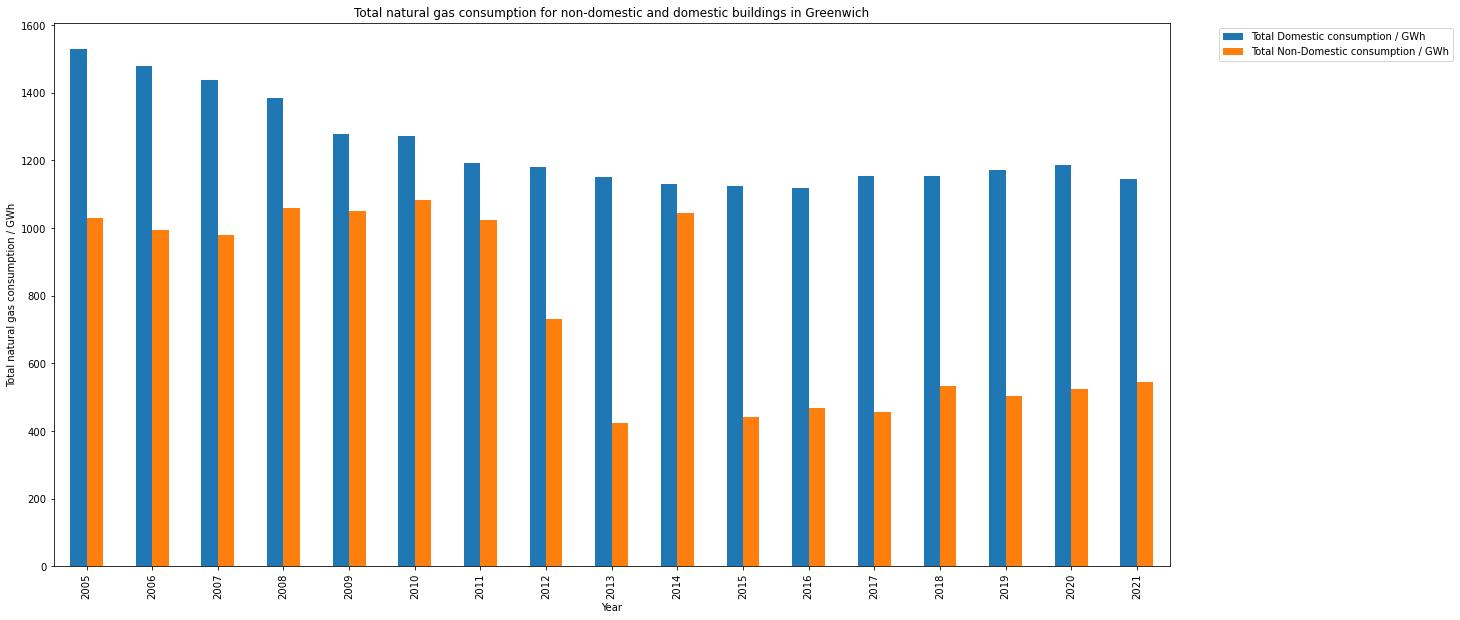

In [62]:
plot_a = la_df[['Year', 'Total Domestic consumption / GWh', 'Total Non-Domestic consumption / GWh']]

plot_a.plot(x = 'Year', 
            kind = 'bar',
            title = 'Total natural gas consumption for non-domestic and domestic buildings in ' + relevant_la)
    
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel("Total natural gas consumption / GWh")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

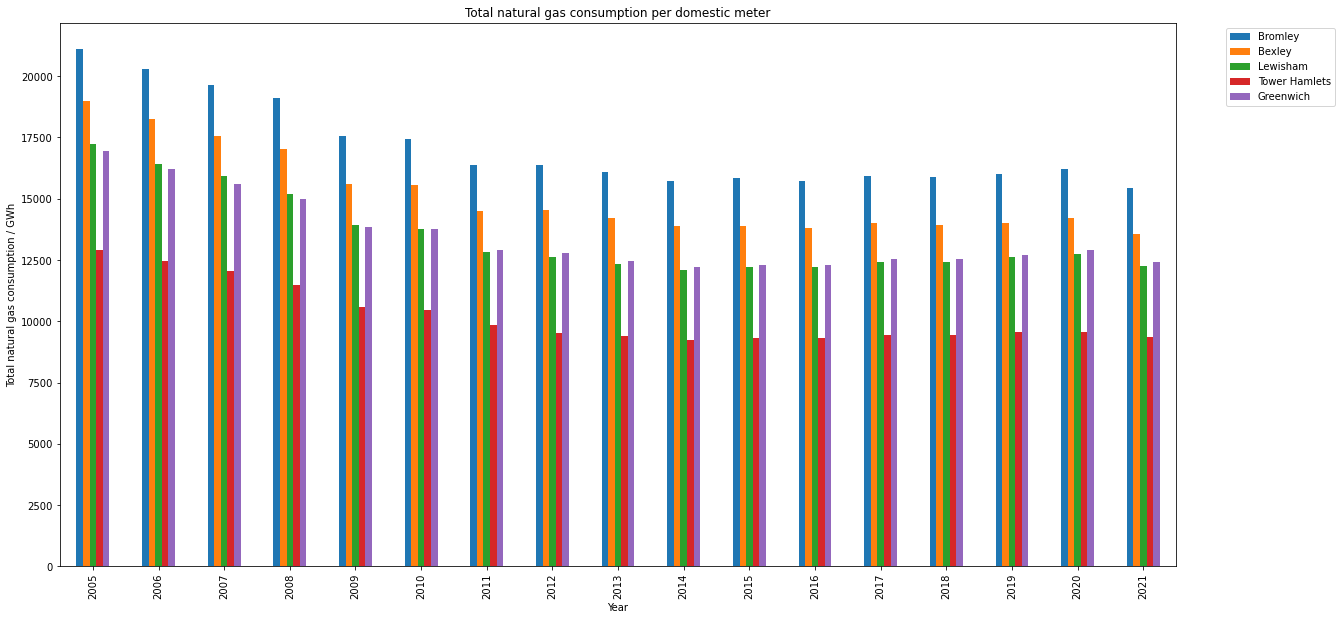

In [69]:
plot_b = pd.pivot_table(comparison_df, values = 'Mean consumption per domestic meter / kWh', index='Year', columns = ['Local authority']).reset_index()
plot_b = plot_b[['Year'] + comparison_las + [relevant_la]]

plot_b.plot(x = 'Year', 
            kind = 'bar',
            title = 'Total natural gas consumption per domestic meter')
    
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel("Total natural gas consumption / GWh")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()